# Trabajo Final Inteligencia Artificial

## Grupo: Cecilia Belen Perez Colasanto, Jose María Klappenbach, María Pilar Artigau, Carolina Picciafuoco, Sofía Zubillaga

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/TP Final IA/TP reseñas/df_filtered_brandon.csv'

df_filtered = pd.read_csv(file_path)

In [ ]:
df_filtered.head()

,business_id,name,address,latitude,longitude,stars_restaurant,categories,hours,review_id,user_id,...,useful,text,attributes,sorted_categories,cat_1,cat_2,cat_3,cat_4,normalized_text,Positive
0,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0"", ""Wednesday"": ""11:0-21:0"", ""Thursday"": ""11:0-21:0"", ""Friday"": ""11:0-22:0"", ""Saturday"": ""11:0-22:0"", ""Sunday"": ""11:0-21:0""}",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,...,1.0,"My boyfriend and I both decided to try Jesse's for the first time after we'd both grown up in the Brandon area and neither of us had ever been, and really hadn't heard much about the restaurant. \n\nWe dined on a Saturday night and even though the parking lot and restaurant was packed, we were sat right away at a 2-top next to a window facing SR-60. \n\nOur server, Nikki, greeted us in a reasonable amount of time. We ordered our beverages and she brought them shortly after that. Something I did not like was there was not a drink menu on the table, but Nikki was able to tell us what beers were on draft and non-alcoholic drinks. She took our appetizer and entree order all at once. \n\nWe ordered crab stuffed mushrooms and a French onion soup to share. These items came out together. The crab stuffed mushroom was basically a giant thing of crab stuffing on a TINY mushroom, which was almost laughable, but had a good flavor nonetheless. The French onion soup had a great flavor and wasn't scalding hot, which was super nice to eat right away. \n\nAfter our appetizer came out and we finished it, our Caesar salads came out as well as a loaf of bread and some butter. This was also really great pacing of our meal! Nikki never let empty plates sit on our table, was very attentive, and always made sure we had drinks in front of us. The Caesar salads were good. I gave the bread two chances... once dipped in the French onion soup and once just with butter on it... the bread could have definitely been better - it just didn't have a good flavor to it. \n\nI ordered the 6 oz filet and he ordered the 16 oz Delmonico - both cooked medium rare. The steaks are served with sautéed mushrooms, your choice of side, and a salad or soup of the day, which isn't mentioned anywhere on the menu. I got broccoli as my side and my boyfriend got a sweet potato with all the fixings. I saw three tables sat after us receive their entrees before us - I don't know if it was a kitchen issue or something else, but we were sat at least five minutes before each of those tables - I tried to make sense of the delay, but it honestly wasn't a big deal to me. Our steaks came out on hot metal plates that were inserted into a cooler outer shell. My filet was nice and thick and cooked perfectly and the broccoli was steamed very tenderly, but there were not enough sautéed mushrooms on the plate, in my opinion. If I had known it would have been like five mushrooms with the steak, I totally would have gotten them as a side. My boyfriend's steak was cooked perfectly as well, but being on the hot metal dish led the steak to cook more at the table, which he wasn't particularly pleased with. He enjoyed his sweet potato with butter, but it didn't come out with cinnamon on it like he requested. \n\nAnyway, I am sure we will return! Our server, Nikki, was fabulous. She was extremely attentive, had a great attitude, and was knowledgeable!","{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodForGroups"": ""True"", ""RestaurantsTakeOut"": ""True"", ""RestaurantsAttire"": ""'casual'"", ""BusinessAcceptsCreditCards"": ""True"", ""Corkage"": ""True"", ""WiFi"": ""u'no'"", ""GoodForKids"": ""True"", ""RestaurantsDelivery"": ""False"", ""BYOBCorkage"": ""'yes_corkage'"", ""NoiseLevel"": ""u'average'"", ""RestaurantsPriceRange2"": ""2"", ""DogsAllowed"": ""False"", ""Ambience"": ""{'romantic': False, 'intimate': False, 'tou

# **Modelo**

In [ ]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Analisis de frecuencia sin stop words

In [ ]:
# Cargar módulos y datos
lemmatizer = WordNetLemmatizer()
stopwords_en = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    # Tokenizamos
    text_tokens = nltk.wordpunct_tokenize(text)

    # Pasamos a minúsculas y alfanumérico
    text_lower_alpha = [token.lower() for token in text_tokens if token.isalnum()]

    # Eliminamos tokens que contengan números
    text_no_numbers = [token for token in text_lower_alpha if not any(char.isdigit() for char in token)]

    # Eliminamos stop-words
    text_clean = [token for token in text_no_numbers if token not in stopwords_en]

    # Lematizamos
    normalized_text = [lemmatizer.lemmatize(word) for word in text_clean]

    return normalized_text

In [ ]:
text_to_analyze = df_filtered.text
text_to_analyze

0        My boyfriend and I both decided to try Jesse's for the first time after we'd both grown up in the Brandon area and neither of us had ever been, and really hadn't heard much about the restaurant. \n\nWe dined on a Saturday night and even though the parking lot and restaurant was packed, we were sat right away at a 2-top next to a window facing SR-60. \n\nOur server, Nikki, greeted us in a reasonable amount of time. We ordered our beverages and she brought them shortly after that. Something I did not like was there was not a drink menu on the table, but Nikki was able to tell us what beers were on draft and non-alcoholic drinks. She took our appetizer and entree order all at once. \n\nWe ordered crab stuffed mushrooms and a French onion soup to share. These items came out together. The crab stuffed mushroom was basically a giant thing of crab stuffing on a TINY mushroom, which was almost laughable, but had a good flavor nonetheless. The French onion soup had a great flavor and w

In [ ]:
tokens_corpus = [token for row in df_filtered.text for token in row]
counts  = nltk.FreqDist(tokens_corpus)
counts

vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 114 palabras únicas y un total de 5000339 palabras con una diversidad léxica de 43862.623


Normalizaremos el texto con la funcion normalize para luego hacer en análisis de las frecuencias

In [ ]:
df_filtered['normalized_text'] = df_filtered['text'].apply(normalize)

In [ ]:
df_filtered.normalized_text

0        [boyfriend, decided, try, jesse, first, time, grown, brandon, area, neither, u, ever, really, heard, much, restaurant, dined, saturday, night, even, though, parking, lot, restaurant, packed, sat, right, away, top, next, window, facing, sr, server, nikki, greeted, u, reasonable, amount, time, ordered, beverage, brought, shortly, something, like, drink, menu, table, nikki, able, tell, u, beer, draft, non, alcoholic, drink, took, appetizer, entree, order, ordered, crab, stuffed, mushroom, french, onion, soup, share, item, came, together, crab, stuffed, mushroom, basically, giant, thing, crab, stuffing, tiny, mushroom, almost, laughable, good, flavor, nonetheless, french, onion, soup, great, flavor, scalding, hot, super, nice, eat, right, away, ...]
1                                                                                                                                                                                                                                          

In [ ]:
tokens_corpus = [token for row in df_filtered.normalized_text for token in row]
counts  = nltk.FreqDist(tokens_corpus)
counts

FreqDist({'food': 8439, 'good': 5684, 'place': 5338, 'great': 5107, 'time': 4275, 'service': 3809, 'back': 3218, 'like': 3013, 'one': 2825, 'go': 2777, ...})

In [ ]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 14898 palabras únicas y un total de 462535 palabras con una diversidad léxica de 31.047


In [ ]:
counts.most_common(20)

[('food', 8439),
 ('good', 5684),
 ('place', 5338),
 ('great', 5107),
 ('time', 4275),
 ('service', 3809),
 ('back', 3218),
 ('like', 3013),
 ('one', 2825),
 ('go', 2777),
 ('get', 2699),
 ('order', 2543),
 ('ordered', 2524),
 ('burger', 2522),
 ('restaurant', 2457),
 ('would', 2169),
 ('u', 2094),
 ('delicious', 2091),
 ('got', 2016),
 ('really', 2008)]

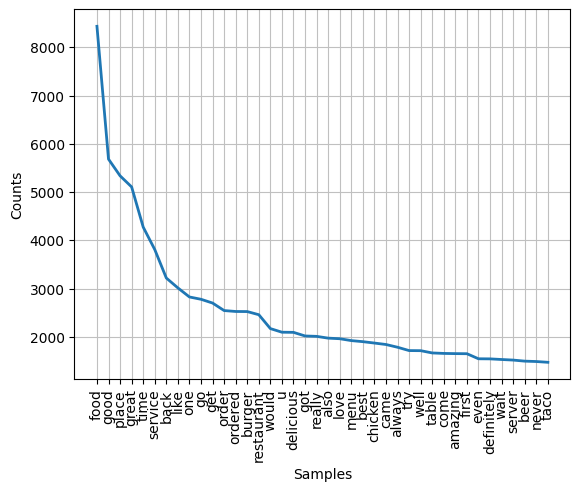

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
counts.plot(40, cumulative=False)

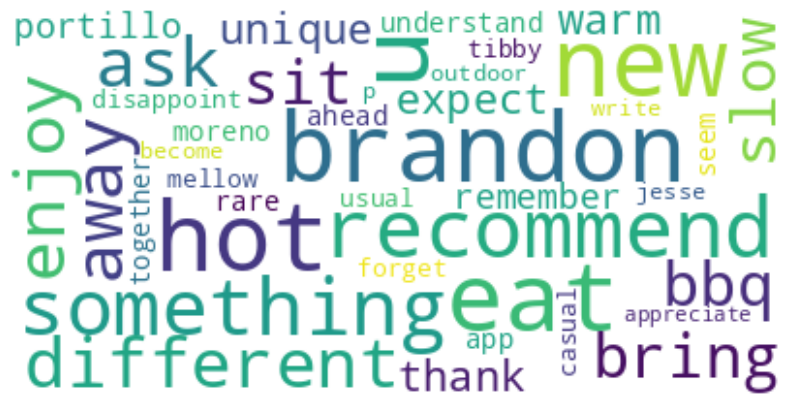

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(' '.join(counts))

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Creamos una nueva columna en la que consideraremos a las reviews con puntaje de 4 o 5 como reviews positivas, las que tienen 1 o 2 como negativas, y aquellas que tienen 3 puntos como neutras. Estas ultimas no resultan utiles para el modelo porque no son ni positivas ni negativas, por lo que no las tendremos en cuenta.

## **WORD 2 VEC: Reseña más representativa**

Para generar resúmenes de reseñas utilizando Word2Vec, puedes seguir estos pasos:

1. Entrenar un modelo Word2Vec con las reseñas.
2. Calcular la representación vectorial promedio de las palabras en cada reseña.
3. Agrupar estas representaciones por restaurante.
4. Calcular la representación vectorial promedio de todas las reseñas de cada restaurante.
5. Seleccionar las reseñas más representativas (las más cercanas al vector promedio) como el resumen.

Word2Vec es una técnica de procesamiento del lenguaje natural (NLP) que se utiliza para generar representaciones vectoriales de palabras, lo que permite a los algoritmos de aprendizaje automático entender el significado y las relaciones semánticas entre las palabras.   
Las representaciones generadas por Word2Vec se conocen como "embeddings".

*Funciones y aplicaciones principales:*

- **Capturar similitudes semánticas:** transforma las palabras en vectores en un espacio de alta dimensión, donde las palabras con significados similares se encuentran cerca unas de otras en ese espacio. Esto permite medir la similitud entre palabras utilizando medidas de distancia como la **distancia coseno**.

- **Mejorar el rendimiento en tareas de NLP:** Las representaciones vectoriales de palabras generadas por Word2Vec se utilizan como insumos en diversos modelos de NLP, mejorando significativamente el rendimiento de estos modelos.

- **Análisis semántico:** Los vectores generados pueden ser utilizados para identificar relaciones semánticas complejas, como analogías. Por ejemplo, se puede usar Word2Vec para resolver la analogía "rey - hombre + mujer = reina"


In [ ]:
df_filtered.head()

,business_id,name,address,latitude,longitude,stars_restaurant,categories,hours,review_id,user_id,...,useful,text,attributes,sorted_categories,cat_1,cat_2,cat_3,cat_4,normalized_text,Positive
0,ZpXZgnBrNodHH8pKpOK_Kg,Jesse's Steak and Seafood,524 W Brandon Blvd,27.938135,-82.292076,4.0,"Sandwiches, Steakhouses, Restaurants, Seafood","{""Monday"": ""11:0-21:0"", ""Tuesday"": ""11:0-21:0"", ""Wednesday"": ""11:0-21:0"", ""Thursday"": ""11:0-21:0"", ""Friday"": ""11:0-22:0"", ""Saturday"": ""11:0-22:0"", ""Sunday"": ""11:0-21:0""}",fFX81fVi2KpnlR7CN7ht_A,Tf9sX1pSq5auLh3CAT9TaQ,...,1.0,"My boyfriend and I both decided to try Jesse's for the first time after we'd both grown up in the Brandon area and neither of us had ever been, and really hadn't heard much about the restaurant. \n\nWe dined on a Saturday night and even though the parking lot and restaurant was packed, we were sat right away at a 2-top next to a window facing SR-60. \n\nOur server, Nikki, greeted us in a reasonable amount of time. We ordered our beverages and she brought them shortly after that. Something I did not like was there was not a drink menu on the table, but Nikki was able to tell us what beers were on draft and non-alcoholic drinks. She took our appetizer and entree order all at once. \n\nWe ordered crab stuffed mushrooms and a French onion soup to share. These items came out together. The crab stuffed mushroom was basically a giant thing of crab stuffing on a TINY mushroom, which was almost laughable, but had a good flavor nonetheless. The French onion soup had a great flavor and wasn't scalding hot, which was super nice to eat right away. \n\nAfter our appetizer came out and we finished it, our Caesar salads came out as well as a loaf of bread and some butter. This was also really great pacing of our meal! Nikki never let empty plates sit on our table, was very attentive, and always made sure we had drinks in front of us. The Caesar salads were good. I gave the bread two chances... once dipped in the French onion soup and once just with butter on it... the bread could have definitely been better - it just didn't have a good flavor to it. \n\nI ordered the 6 oz filet and he ordered the 16 oz Delmonico - both cooked medium rare. The steaks are served with sautéed mushrooms, your choice of side, and a salad or soup of the day, which isn't mentioned anywhere on the menu. I got broccoli as my side and my boyfriend got a sweet potato with all the fixings. I saw three tables sat after us receive their entrees before us - I don't know if it was a kitchen issue or something else, but we were sat at least five minutes before each of those tables - I tried to make sense of the delay, but it honestly wasn't a big deal to me. Our steaks came out on hot metal plates that were inserted into a cooler outer shell. My filet was nice and thick and cooked perfectly and the broccoli was steamed very tenderly, but there were not enough sautéed mushrooms on the plate, in my opinion. If I had known it would have been like five mushrooms with the steak, I totally would have gotten them as a side. My boyfriend's steak was cooked perfectly as well, but being on the hot metal dish led the steak to cook more at the table, which he wasn't particularly pleased with. He enjoyed his sweet potato with butter, but it didn't come out with cinnamon on it like he requested. \n\nAnyway, I am sure we will return! Our server, Nikki, was fabulous. She was extremely attentive, had a great attitude, and was knowledgeable!","{""Alcohol"": ""u'full_bar'"", ""RestaurantsGoodForGroups"": ""True"", ""RestaurantsTakeOut"": ""True"", ""RestaurantsAttire"": ""'casual'"", ""BusinessAcceptsCreditCards"": ""True"", ""Corkage"": ""True"", ""WiFi"": ""u'no'"", ""GoodForKids"": ""True"", ""RestaurantsDelivery"": ""False"", ""BYOBCorkage"": ""'yes_corkage'"", ""NoiseLevel"": ""u'average'"", ""RestaurantsPriceRange2"": ""2"", ""DogsAllowed"": ""False"", ""Ambience"": ""{'romantic': False, 'intimate': False, 'tou

In [ ]:
!pip install gensim


In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=df_filtered['normalized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Función para obtener el vector promedio de una reseña
def get_avg_vector(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Calcular los vectores promedio para cada reseña
df_filtered['avg_vector'] = df_filtered['normalized_text'].apply(lambda x: get_avg_vector(x, model))

# Agrupar por restaurante y calcular el vector promedio de todas las reseñas
restaurant_vectors = df_filtered.groupby('name')['avg_vector'].apply(lambda x: np.mean(np.vstack(x), axis=0))

# Función para encontrar la reseña más cercana al vector promedio
def find_closest_review(group, vector):
    group_vectors = np.vstack(group['avg_vector'])
    similarities = cosine_similarity([vector], group_vectors)
    closest_idx = similarities.argmax()
    return group.iloc[closest_idx]['text']

# Generar el resumen para cada restaurante
summaries = []

for name, group in df_filtered.groupby('name'):
    avg_vector = restaurant_vectors[name]
    closest_review = find_closest_review(group, avg_vector)
    summaries.append({'name': name, 'summary': closest_review})

# Convertir los resúmenes a un DataFrame
summary_mejor_reseña_df = pd.DataFrame(summaries)

In [ ]:
pd.set_option('display.max_colwidth', None)
summary_mejor_reseña_df.head()

,name,summary
0,Bahama Breeze,"Been to other Bahama Breeze restaurants, but not this one until now. Since it was a Saturday, we figured we better do the online version of ""Call Ahead"" which proved to be a wise choice since it was so busy when we arrived and patrons were being told there was a 45 minute wait time.\nSince my sister had dropped me off while she went in search of a parking space I went in and was seated almost immediately. Our waiter came right over and introduced himself and said he would be back when she came in, which he was!\nThe menu has many yummy drink offerings to choose from and since we couldn't decide, we asked our waiter for a recommendation. He suggested Mojitos and when we said we didn't like them his next suggestion was Hibiscus Margaritas.\nPerfect!!! Beautiful presentation and really good flavor---a bit light on alcohol, but very tasty.\nThen came the dinner choice! Once again lots of wonderful sounding apps, dinners, salads and sandwiches. Everything sounded delicious! So, we asked our waiter his thoughts on a few items and we were impressed with his honesty. We asked for his recommendation and he said that the Shrimp and Grits were really good and his favorite. Again, I was very impressed that he didn't push a more expensive item.\nThe shrimp and grits were right on. Lots of shrimp and a very flavorful bacon sauce with really good grits. It was wonderful! We were in heaven!\nOur waiter was attentive, friendly and definitely in tune with providing great customer service.\nOne thing that took a little of the joy away from our delicious dinner was that everything on the menu had the calories listed! Obviously, if you are counting calories, this would be a great feature, but on the other hand, the dose of reality was a little spirit downing---at least while the menus were open!\nOverall, great dinner and service. Wish I could remember our server's name, but can't."
1,Bawarchi Biryani's,"A surprisingly good restaurant in a sea of mediocre ethnic restaurants. Lovely service with helpful suggestions and great tolerance for an uneducated palate. Loved the white tablecloth, beautiful lake view, and gentle dining atmosphere. Food was excellent, and suitably down spiced for my sensitive palate. I wished for only one thing when we were there: ice for my drink. I would never go there without ordering their garlic Naan, the vegetable dumplings appetizer in sauce to die for, and one of the authentic, and delicious, chicken biryani. Other than that, we venture out for new discoveries. Plenty to eat, and plenty to take home. I swear it's even better the next day."
2,Black Rock Bar & Grill,"I came here for the first time because my friend got a coupon in the mail for a free app or dessert. We were craving steak so we looked it up and it was absolutely amazing. The staff was so helpful and cared about if your experience. The food came out without too long of a wait. The serving size of the beef was perfect, we both got 9oz and was fabulous. The best was that we were able to do call ahead seating, because I personally hate to wait. The only thing I would say they could improve on would be the amount of veggies on their side plates. I love my veggies and having 4 asparagus just doesn't cut it for me. Overall, amazing and yummy experience."
3,Bonefish Grill,"We came to this location for brunch after a failed attempted at another place. We were greeted warmly and seated immediately.\n\nTheir brunch menu is great and affordable. If you order an entree you can get unlimited champagne, mimosas, sangria, or Bellini. You can mix and match if you want. Our waiter said he just keeps them flowing and he sure did!! I tried all of the drinks but sangria was my favorite.\nI also appreciated the fact that the drinks had an appropriate amount of alcohol to juice ratio. Many of these brunch places are serving them basically virgin style ok? \n\nAnyway...they have traditional brunch options like French toast and omelette's. Some a

Obtenemos un dataset con el nombre del restaurante y una reseña que según Word2Vec es la más representativa del local, teniendo en cuenta la cercanía al vector promedio.

## **TF IDF: Resumen de palabras**


TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica utilizada en el procesamiento del lenguaje natural (NLP) y la minería de textos para evaluar la importancia de una palabra en un documento en relación a un corpus de documentos.


### ¿Para qué sirve TF-IDF?

1. **Medir la relevancia de una palabra**: TF-IDF se utiliza para determinar qué tan importante es una palabra dentro de un documento específico en comparación con su frecuencia en el corpus completo. La idea es que las palabras que son comunes en muchos documentos (como "y", "el", "de") no son tan importantes como las palabras que son únicas o raras en ese documento.

2. **Extracción de características para modelos de aprendizaje automático**: TF-IDF convierte los documentos en vectores de características que pueden ser utilizados por algoritmos de aprendizaje automático para tareas como clasificación de textos, clustering y recuperación de información.

### Cómo funciona TF-IDF

- **TF (Term Frequency)**: Mide la frecuencia de una palabra en un documento. Se calcula como el número de veces que una palabra aparece en un documento dividido por el número total de palabras en el documento.

  $$
  \text{TF}(t, d) = \frac{\text{Número de veces que la palabra } t \text{ aparece en el documento } d}{\text{Número total de palabras en el documento } d}
  $$

- **IDF (Inverse Document Frequency)**: Mide la importancia de una palabra en el corpus completo. Se calcula como el logaritmo del número total de documentos dividido por el número de documentos que contienen la palabra.

  $$
  \text{IDF}(t, D) = \log\left(\frac{\text{Número total de documentos } N}{1 + \text{Número de documentos que contienen la palabra } t}\right)
  $$

- **TF-IDF**: Es el producto de TF y IDF.

  $$
  \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
  $$



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from collections import Counter

# Asegúrate de que nltk esté configurado correctamente para la lematización
nltk.download('wordnet')

# Función para convertir las listas de palabras en texto
def list_to_string(text_list):
    return " ".join(text_list)

# Función para obtener las palabras y frases más relevantes usando TF-IDF
def get_top_n_keywords(texts, top_n=10):
    text_data = [list_to_string(text) for text in texts]
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text_data)
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    sorted_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [word for word, score in sorted_keywords]

# Generar resúmenes para cada restaurante
summaries = []

for name, group in df_filtered.groupby('name'):
    tokenized_reviews = group['normalized_text'].tolist()
    keywords = get_top_n_keywords(tokenized_reviews)
    summary = f"{', '.join(keywords)}"
    summaries.append({'name': name, 'summary': summary})

# Convertir los resúmenes a un DataFrame
summary_palabras_df = pd.DataFrame(summaries)

# Mostrar el DataFrame con los resúmenes
summary_palabras_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,name,summary
0,Bahama Breeze,"good, food, time, drink, great, service, shrimp, happy, hour, appetizer"
1,Bawarchi Biryani's,"food, chicken, biryani, indian, place, good, great, time, service, restaurant"
2,Black Rock Bar & Grill,"steak, food, great, rock, place, service, good, experience, time, back"
3,Bonefish Grill,"bang, food, great, good, service, shrimp, time, always, back, restaurant"
4,Brandon Pizzeria,"pizza, great, place, good, cheese, service, food, back, brandon, time"


In [ ]:
# Mostrar el DataFrame con los resúmenes
summary_palabras_df.head()

,name,summary
0,Bahama Breeze,"good, food, time, drink, great, service, shrimp, happy, hour, appetizer"
1,Bawarchi Biryani's,"food, chicken, biryani, indian, place, good, great, time, service, restaurant"
2,Black Rock Bar & Grill,"steak, food, great, rock, place, service, good, experience, time, back"
3,Bonefish Grill,"bang, food, great, good, service, shrimp, time, always, back, restaurant"
4,Brandon Pizzeria,"pizza, great, place, good, cheese, service, food, back, brandon, time"


Podemos unir ambos modelos y obtenerlas 10 palabras más nombradas junto a la reseña más representativa del restaurante:

In [ ]:
summary_mix = pd.merge(summary_palabras_df, summary_mejor_reseña_df, on='name', how='left')
summary_mix.rename(columns={'summary_x': 'palabras_destacadas', 'summary_y': 'mejor_reseña'}, inplace=True)
df_nlp = summary_mix
df_nlp.head(10)

,name,palabras_destacadas,mejor_reseña
0,Bahama Breeze,"good, food, time, drink, great, service, shrimp, happy, hour, appetizer","Been to other Bahama Breeze restaurants, but not this one until now. Since it was a Saturday, we figured we better do the online version of ""Call Ahead"" which proved to be a wise choice since it was so busy when we arrived and patrons were being told there was a 45 minute wait time.\nSince my sister had dropped me off while she went in search of a parking space I went in and was seated almost immediately. Our waiter came right over and introduced himself and said he would be back when she came in, which he was!\nThe menu has many yummy drink offerings to choose from and since we couldn't decide, we asked our waiter for a recommendation. He suggested Mojitos and when we said we didn't like them his next suggestion was Hibiscus Margaritas.\nPerfect!!! Beautiful presentation and really good flavor---a bit light on alcohol, but very tasty.\nThen came the dinner choice! Once again lots of wonderful sounding apps, dinners, salads and sandwiches. Everything sounded delicious! So, we asked our waiter his thoughts on a few items and we were impressed with his honesty. We asked for his recommendation and he said that the Shrimp and Grits were really good and his favorite. Again, I was very impressed that he didn't push a more expensive item.\nThe shrimp and grits were right on. Lots of shrimp and a very flavorful bacon sauce with really good grits. It was wonderful! We were in heaven!\nOur waiter was attentive, friendly and definitely in tune with providing great customer service.\nOne thing that took a little of the joy away from our delicious dinner was that everything on the menu had the calories listed! Obviously, if you are counting calories, this would be a great feature, but on the other hand, the dose of reality was a little spirit downing---at least while the menus were open!\nOverall, great dinner and service. Wish I could remember our server's name, but can't."
1,Bawarchi Biryani's,"food, chicken, biryani, indian, place, good, great, time, service, restaurant","A surprisingly good restaurant in a sea of mediocre ethnic restaurants. Lovely service with helpful suggestions and great tolerance for an uneducated palate. Loved the white tablecloth, beautiful lake view, and gentle dining atmosphere. Food was excellent, and suitably down spiced for my sensitive palate. I wished for only one thing when we were there: ice for my drink. I would never go there without ordering their garlic Naan, the vegetable dumplings appetizer in sauce to die for, and one of the authentic, and delicious, chicken biryani. Other than that, we venture out for new discoveries. Plenty to eat, and plenty to take home. I swear it's even better the next day."
2,Black Rock Bar & Grill,"steak, food, great, rock, place, service, good, experience, time, back","I came here for the first time because my friend got a coupon in the mail for a free app or dessert. We were craving steak so we looked it up and it was absolutely amazing. The staff was so helpful and cared about if your experience. The food came out without too long of a wait. The serving size of the beef was perfect, we both got 9oz and was fabulous. The best was that we were able to do call ahead seating, because I personally hate to wait. The only thing I would say they could improve on would be the amount of veggies on their side plates. I love my veggies and having 4 asparagus just doesn't cut it for me. Overall, amazing and yummy experience."
3,Bonefish Grill,"bang, food, great, good, service, shrimp, time, always, back, restaurant","We came to this location for brunch after a failed attempted at another place. We were greeted warmly and seated immediately.\n\nTheir brunch menu is great and affordable. If you order an entree you can get unlimited champagne, mimosas, sangria, or Bellini. You can mix and match if you want. Our waiter said he just keeps them flowing and he

## **TF IDF Prueba 2**

Acá lo que hago es agrupar todas las reseñas de cada restaurante en una misma cadena y a eso aplicarle el TFIDF.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Asegúrate de que nltk esté configurado correctamente
nltk.download('wordnet')
nltk.download('stopwords')

# Lista de palabras comunes a excluir
common_words = list(set(stopwords.words('english')).union({ 'food', 'restaurant', 'place'}))

# Función para unir todas las reseñas de un restaurante en una sola cadena de texto
def combine_reviews(reviews):
    return " ".join(reviews)

# Agrupar las reseñas por restaurante y combinar las reseñas en una sola cadena de texto
df_grouped = df_filtered.groupby('name')['normalized_text'].apply(lambda x: combine_reviews([" ".join(review) for review in x])).reset_index()

# Aplicar TF-IDF a las reseñas combinadas
vectorizer = TfidfVectorizer(stop_words=common_words, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df_grouped['normalized_text'])

# Función para obtener las palabras más relevantes usando TF-IDF
def get_top_n_keywords(tfidf_matrix, feature_names, top_n=10):
    sorted_indices = tfidf_matrix.toarray().argsort(axis=1)[:, -top_n:]
    top_keywords = []
    for row in sorted_indices:
        top_keywords.append([feature_names[i] for i in row])
    return top_keywords

# Obtener los nombres de las características (palabras)
feature_names = vectorizer.get_feature_names_out()

# Obtener las palabras clave más importantes para cada restaurante
df_grouped['keywords'] = get_top_n_keywords(tfidf_matrix, feature_names)

# Generar resúmenes para cada restaurante
df_grouped['summary'] = df_grouped['keywords'].apply(lambda x: f" {', '.join(x)}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_grouped[['name', 'summary']].head()

,name,summary
0,Bahama Breeze,"great, jerk, shrimp, happy hour, good, drink, time, breeze, bahama, bahama breeze"
1,Bawarchi Biryani's,"tikka masala, good, tikka, curry, bawarchi, masala, chicken, naan, indian, biryani"
2,Black Rock Bar & Grill,"experience, good, server, stone, time, black, great, rock, steak, black rock"
3,Bonefish Grill,"brunch, bonefish grill, great, service, shrimp, good, bang shrimp, bang bang, bang, bonefish"
4,Brandon Pizzeria,"time, back, crust, good, great, cheese, knot, brandon pizzeria, pizzeria, pizza"


In [ ]:
summary_mix2 = pd.merge(summary_mejor_reseña_df, df_grouped[['name', 'summary']], on='name', how='left')
summary_mix2.head(10)

,name,summary_x,summary_y
0,Bahama Breeze,"Been to other Bahama Breeze restaurants, but not this one until now. Since it was a Saturday, we figured we better do the online version of ""Call Ahead"" which proved to be a wise choice since it was so busy when we arrived and patrons were being told there was a 45 minute wait time.\nSince my sister had dropped me off while she went in search of a parking space I went in and was seated almost immediately. Our waiter came right over and introduced himself and said he would be back when she came in, which he was!\nThe menu has many yummy drink offerings to choose from and since we couldn't decide, we asked our waiter for a recommendation. He suggested Mojitos and when we said we didn't like them his next suggestion was Hibiscus Margaritas.\nPerfect!!! Beautiful presentation and really good flavor---a bit light on alcohol, but very tasty.\nThen came the dinner choice! Once again lots of wonderful sounding apps, dinners, salads and sandwiches. Everything sounded delicious! So, we asked our waiter his thoughts on a few items and we were impressed with his honesty. We asked for his recommendation and he said that the Shrimp and Grits were really good and his favorite. Again, I was very impressed that he didn't push a more expensive item.\nThe shrimp and grits were right on. Lots of shrimp and a very flavorful bacon sauce with really good grits. It was wonderful! We were in heaven!\nOur waiter was attentive, friendly and definitely in tune with providing great customer service.\nOne thing that took a little of the joy away from our delicious dinner was that everything on the menu had the calories listed! Obviously, if you are counting calories, this would be a great feature, but on the other hand, the dose of reality was a little spirit downing---at least while the menus were open!\nOverall, great dinner and service. Wish I could remember our server's name, but can't.","great, jerk, shrimp, happy hour, good, drink, time, breeze, bahama, bahama breeze"
1,Bawarchi Biryani's,"A surprisingly good restaurant in a sea of mediocre ethnic restaurants. Lovely service with helpful suggestions and great tolerance for an uneducated palate. Loved the white tablecloth, beautiful lake view, and gentle dining atmosphere. Food was excellent, and suitably down spiced for my sensitive palate. I wished for only one thing when we were there: ice for my drink. I would never go there without ordering their garlic Naan, the vegetable dumplings appetizer in sauce to die for, and one of the authentic, and delicious, chicken biryani. Other than that, we venture out for new discoveries. Plenty to eat, and plenty to take home. I swear it's even better the next day.","tikka masala, good, tikka, curry, bawarchi, masala, chicken, naan, indian, biryani"
2,Black Rock Bar & Grill,"I came here for the first time because my friend got a coupon in the mail for a free app or dessert. We were craving steak so we looked it up and it was absolutely amazing. The staff was so helpful and cared about if your experience. The food came out without too long of a wait. The serving size of the beef was perfect, we both got 9oz and was fabulous. The best was that we were able to do call ahead seating, because I personally hate to wait. The only thing I would say they could improve on would be the amount of veggies on their side plates. I love my veggies and having 4 asparagus just doesn't cut it for me. Overall, amazing and yummy experience.","experience, good, server, stone, time, black, great, rock, steak, black rock"
3,Bonefish Grill,"We came to this location for brunch after a failed attempted at another place. We were greeted warmly and seated immediately.\n\nTheir brunch menu is great and affordable. If you order an entree you can get unlimited champagne, mimosas, sangria, or Bellini. You can mix and match if you want. Our waiter said he just keeps them flowing and he sure did!! I tried all of the drinks but sangria was my favorite.\

## Conclusión:

### Comparación de TF-IDF y Word2Vec

#### Ventajas de TF-IDF

1. **Simplicidad**: TF-IDF es fácil de entender e implementar. No requiere un proceso de entrenamiento extenso.
2. **Menos recursos computacionales**: Generar TF-IDF es más rápido y consume menos recursos comparado con el entrenamiento de modelos de Word2Vec.
3. **Interpretabilidad**: Las puntuaciones de TF-IDF son directamente interpretables, ya que representan la importancia de las palabras en los documentos.

#### Desventajas de TF-IDF

1. **Ignora el contexto**: TF-IDF solo considera la frecuencia de las palabras y no su contexto semántico. No puede capturar las relaciones entre palabras de la misma manera que Word2Vec.
2. **Alta dimensionalidad**: El vector resultante de TF-IDF puede ser muy grande, ya que cada palabra única en el corpus representa una dimensión en el vector.

#### Ventajas de Word2Vec

1. **Captura relaciones semánticas**: Word2Vec puede capturar similitudes semánticas entre palabras y relaciones complejas como analogías.
2. **Dimensionalidad reducida**: Los vectores de Word2Vec tienen una dimensionalidad fija y reducida (por ejemplo, 100-300 dimensiones), lo que hace que los modelos sean más eficientes.

#### Desventajas de Word2Vec

1. **Requiere entrenamiento**: Word2Vec necesita un proceso de entrenamiento, que puede ser computacionalmente costoso, especialmente con grandes corpus de datos.
2. **Más complejo**: La implementación y comprensión de Word2Vec puede ser más compleja en comparación con TF-IDF.

### Conclusión

La elección entre TF-IDF y Word2Vec depende de la aplicación específica y los requisitos del proyecto. TF-IDF es una buena opción para aplicaciones que necesitan una medida rápida y fácil de importancia de palabras sin considerar las relaciones semánticas, mientras que Word2Vec es más adecuado para aplicaciones que requieren la captura de relaciones complejas y semánticas entre palabras.

### Exportación de la notebook

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/TP Final IA/df_nlp.csv'

# Exportar el DataFrame a un archivo CSV en Google Drive
df_nlp.to_csv(file_path, index=False)

print(f'Archivo guardado en: {file_path}')

Archivo guardado en: /content/drive/MyDrive/TP Final IA/df_nlp.csv
